# 記述統計
## データ準備

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip']/df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布の描画

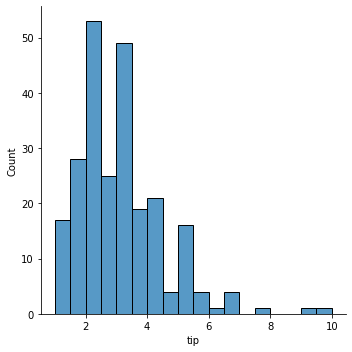

In [8]:
sns.displot(df['tip'], kde=False)

In [9]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


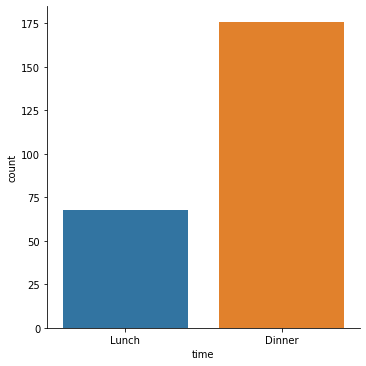

In [10]:
sns.catplot(x='time', data=df, kind='count')

## 平均値

In [11]:
np.mean(df['tip_rate'])

0.16080258172250478

In [12]:
df['tip_rate'].mean()

0.16080258172250478

In [13]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

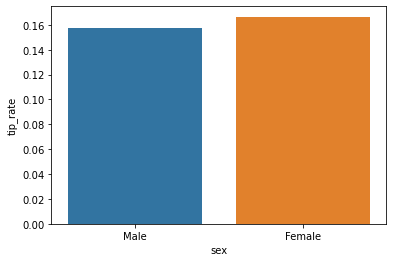

In [14]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

<AxesSubplot:xlabel='sex'>

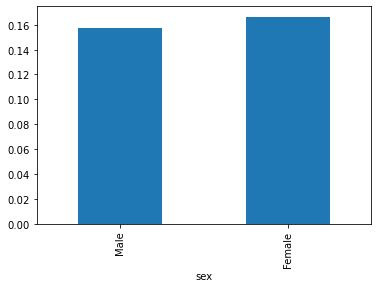

In [15]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## 中央値

In [16]:
np.median(df['tip_rate'])

0.15476977125802577

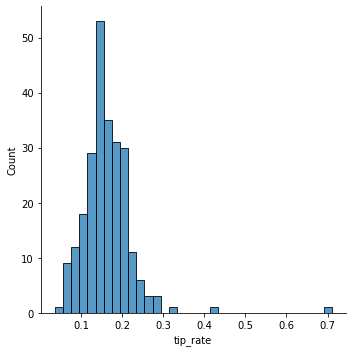

In [17]:
sns.displot(df['tip_rate'], kde=False)

In [18]:
df['tip_rate'].median()

0.15476977125802577

In [19]:
df.groupby('sex').median()['tip_rate']

sex
Male      0.153492
Female    0.155581
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

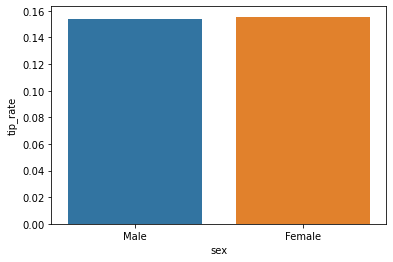

In [20]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [21]:
df.sort_values('tip_rate', ascending=True)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


## 最頻値(mode)

In [22]:
mode, count = stats.mode(df)

In [23]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [24]:
df['size'].mode()

0    2
dtype: int64

In [25]:
stats.mode(df['size'])

ModeResult(mode=array([2]), count=array([156]))

In [26]:
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

## 範囲(range)

In [27]:
np.min(df['tip'])

1.0

In [28]:
df['tip'].min()

1.0

In [29]:
df.groupby('sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [30]:
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [31]:
df['tip'].max() - df['tip'].min() 

9.0

## 四分位数 (quantile)

In [32]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [33]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

### 四分位範囲 (iqr)

In [34]:
stats.iqr(df['tip_rate'])

0.06234812458689151

In [35]:
df['tip_rate'].quantile([0.75]).iloc[-1] - df['tip_rate'].quantile([0.25]).iloc[-1]  

0.06234812458689151

### 四分位編差（QD)

In [36]:
stats.iqr(df['tip_rate']) / 2

0.031174062293445756

### 箱ひげ図 (boxplot)

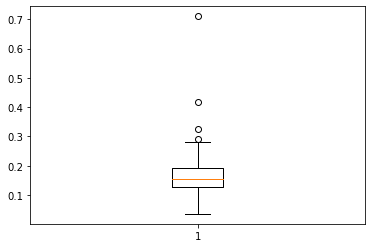

In [37]:
plt.boxplot(df['tip_rate'])
plt.show()

<AxesSubplot:xlabel='size', ylabel='tip_rate'>

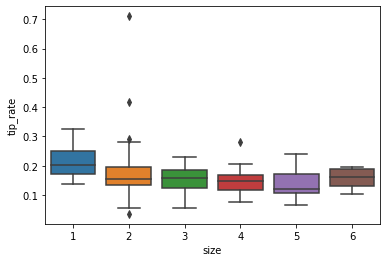

In [38]:
sns.boxplot(x='size', y='tip_rate', data=df)

## 分散

In [87]:
np.var(df['tip'])

1.9066085124966428

## 標準編差

In [88]:
np.std(df['tip'])

1.3807999538298958

In [89]:
np.sqrt(np.var(df['tip']))

1.3807999538298958

In [91]:
tip_mean = df['tip'].mean()
tip_mean

2.9982786885245902

## 共分散 (covariance)

In [40]:
# bias=False: 不偏分散(n-1で割ったもの)
np.cov([1,2,3], [-4, 5, 16], bias=True)

array([[ 0.66666667,  6.66666667],
       [ 6.66666667, 66.88888889]])

In [97]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [99]:
np.stack([df['total_bill'], df['tip'], df['size']], axis=0).shape

(3, 244)

In [104]:
np.stack([df['total_bill'], df['tip'], df['size']], axis=0).shape

(3, 244)

In [106]:
# np.cov(bias=True)は標本分散
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

変数ごとに値の尺度が異なるので、共分散が大きいからといって、ある変数間に相関関係があるとは一概には言えない。相関関係を求めるためには、相関係数を求める必要がある

In [41]:
# df.cov()は不偏分散(n-1)
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## 相関係数 (correlation coefficient)

- 共分散を標準化したものが相関係数
- 共分散のとりうる値（最小ー最大）を計算し、-1から1の範囲にすることを考える
- -SxSy : 負の相関関係が最大
- SxSy : 正の相関関係が最大
- -SxSy <= Sxy <= SxSy に $\frac{1}{SxSy}$をかけると、$-1 \leq \frac{Sxy}{SxSy} \leq 1$ (ピアソンの積率相関係数）


In [42]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [43]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [112]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


お会計の金額が上がると、tipは上がるが、tip_rateは下がる

<AxesSubplot:>

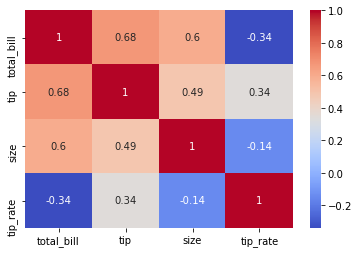

In [117]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 連関 (Association)

- Category変数間の相関関係
- 分割表 (contingency table)を用いて計算する

### 観測度数 (observed frequency)

- 分割表内の数字を観測度数という

### 期待度数 (Expected frequency)

- 連関が無いと想定した場合の度数

## カイ二乗

- 観測度数が期待度数からどれくらい離れているのかを計算した値  
- {$(観測度数-期待度数)^2$/期待度数}の総和

$$ \chi^2 = \sum_{i=1}^{a} \sum_{j=1}^{b} \frac{(n_ij - e_ij)^2}{ e_ij } $$

- カイ二乗が大きいからといって、相関関係が高いとは一概には言えない（変数が多いほど大きくなるため、標準化する必要がある


In [44]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [120]:
cont_table = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

1つ目の `10.277251918677742` がカイ二乗値  
4つ目のarrayは、期待度数の分割表

10は大きい？か不明であるため、連関の比較ができない。標準化が必要。

### クラメールの連関係数

- 連関の強さを表す指標
- $\chi^2$を0-1に標準化した値
- min(a, b)は行数a, 列数bの小さい方
- Nは全体の度数

$$ V = \sqrt{\frac{\chi^2}{(min(a,b)-1)N}} $$

In [137]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    a, b = cont_table.shape
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]

    return np.sqrt(chi2/((min(a,b)-1)*len(x)))

In [138]:
cramers_v(df['sex'], df['time'])

0.20523129613344476

### 相関の強さ

- 明確な基準はない
- 連関係数も同様
- 感覚的には+-で、、
  - 0-0.2 ほぼそうかんなし
  - 0.2-0.4 弱い
  - 0.4-0.7 中くらい
  - 0.7-1 強い